<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-Dataset-&amp;-Setup" data-toc-modified-id="Loading-Dataset-&amp;-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading Dataset &amp; Setup</a></span></li><li><span><a href="#Basic-Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Basic-Exploratory-Data-Analysis-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Basic Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Checking-for-missing-values" data-toc-modified-id="Checking-for-missing-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Checking for missing values</a></span></li><li><span><a href="#Checking-for-abnormal-values" data-toc-modified-id="Checking-for-abnormal-values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Checking for abnormal values</a></span></li><li><span><a href="#Looking-at-numerical-value-correlations" data-toc-modified-id="Looking-at-numerical-value-correlations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Looking at numerical value correlations</a></span></li><li><span><a href="#Now-let's-take-a-look-at-categorical-data:" data-toc-modified-id="Now-let's-take-a-look-at-categorical-data:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Now let's take a look at categorical data:</a></span></li><li><span><a href="#Better-&amp;-more-relevant-visualization-using-@-Jifu-Zhao's-idea,-(Github-linked-here)" data-toc-modified-id="Better-&amp;-more-relevant-visualization-using-@-Jifu-Zhao's-idea,-(Github-linked-here)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Better &amp; more relevant visualization using @ Jifu Zhao's idea, (Github linked <a href="https://github.com/JifuZhao/DS-Take-Home" target="_blank">here</a>)</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Feature-Engineering-For-Dataset" data-toc-modified-id="Feature-Engineering-For-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering For Dataset</a></span></li><li><span><a href="#Prediction-Preprocessing-Pipelines" data-toc-modified-id="Prediction-Preprocessing-Pipelines-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Prediction Preprocessing Pipelines</a></span><ul class="toc-item"><li><span><a href="#Make-a-copy-of-dataset-&amp;-split-dataset-into-train-and-test" data-toc-modified-id="Make-a-copy-of-dataset-&amp;-split-dataset-into-train-and-test-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Make a copy of dataset &amp; split dataset into train and test</a></span></li><li><span><a href="#Getting-y-value-out-of-dataset" data-toc-modified-id="Getting-y-value-out-of-dataset-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Getting <code>y</code> value out of dataset</a></span></li><li><span><a href="#Getting-X-value-out-of-dataset-using-Pipelines" data-toc-modified-id="Getting-X-value-out-of-dataset-using-Pipelines-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Getting <code>X</code> value out of dataset using Pipelines</a></span></li></ul></li><li><span><a href="#Put-Train-set-through-a-Random-Forest" data-toc-modified-id="Put-Train-set-through-a-Random-Forest-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Put Train set through a Random Forest</a></span><ul class="toc-item"><li><span><a href="#Generating-Test-set" data-toc-modified-id="Generating-Test-set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Generating Test set</a></span></li><li><span><a href="#Applying-to-Random-Forest-Model" data-toc-modified-id="Applying-to-Random-Forest-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Applying to Random Forest Model</a></span></li><li><span><a href="#Trying-GBRT-model-for-better-partial-dependency" data-toc-modified-id="Trying-GBRT-model-for-better-partial-dependency-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Trying GBRT model for better partial dependency</a></span></li></ul></li></ul></div>

# Loading Dataset & Setup

Loading Dataset & Setting up plotting

In [1]:
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

file_loc = os.getcwd()
df = pd.read_csv(os.path.join(file_loc, 'conversion_data.csv'))

df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Basic Exploratory Data Analysis (EDA)

A few things we need to do before we dive into predictions:
- check for missing values
- check for abnormal values
- looking at distribution for numeric and categorical values

---
## Checking for missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


Seems like no data is missing so we don't have to make a decision about those missing values

----
## Checking for abnormal values

In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


A few things to note here:
- We need to take a detailed look at age, as the max is 123, which is impossible
- Also the mean of converted is 0.03, meaning that conversion is __highly skewed__ (which is not surprising)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fc43b38>,
      dtype=object)

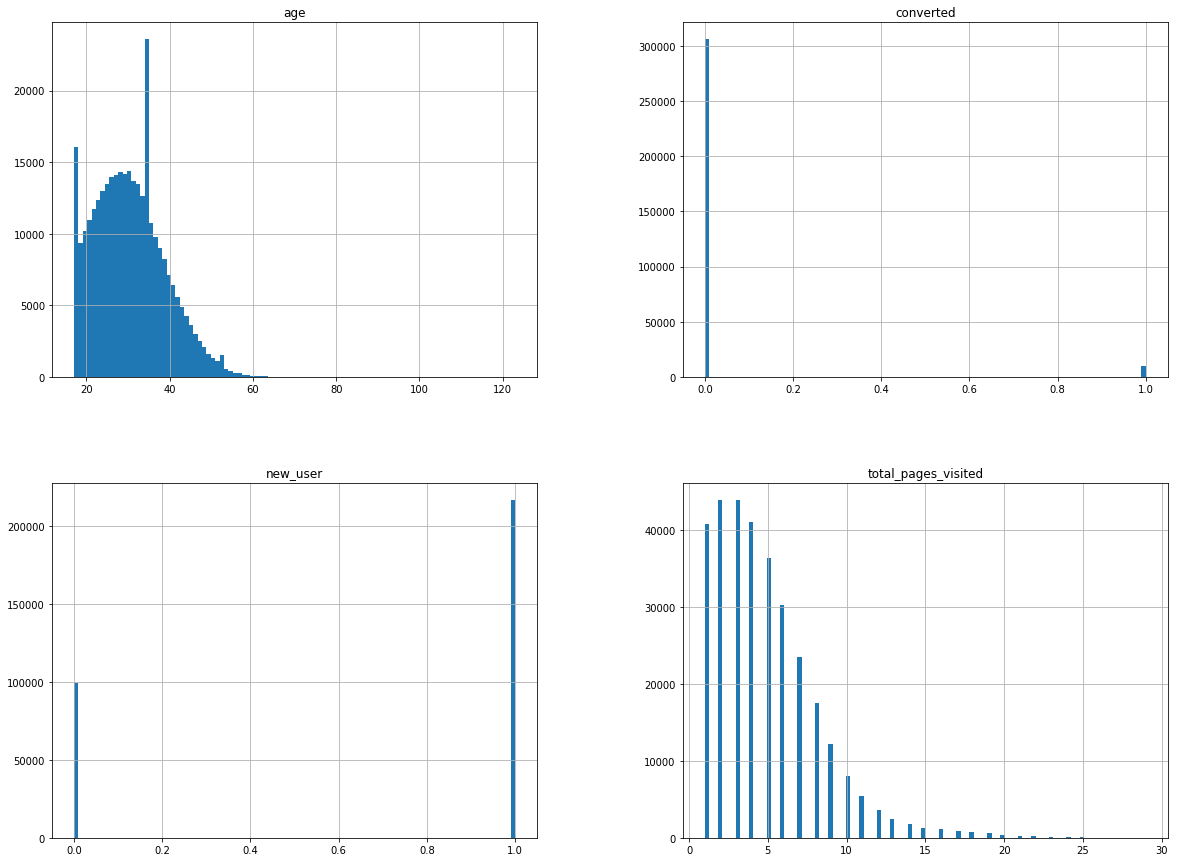

In [4]:
df.hist(bins = 100, figsize = (20,15))

The plot confirms our suspicion on data, let's dive further to take a look at distribution of individual values, specifically __age__

In [5]:
df.groupby('age')['age'].count()

age
17      7597
18      8466
19      9349
20     10156
21     10966
22     11701
23     12336
24     12960
25     13460
26     13931
27     14084
28     14341
29     14158
30     14346
31     13692
32     13507
33     12631
34     12108
35     11471
36     10779
37      9761
38      8970
39      8202
40      7148
41      6401
42      5588
43      4904
44      4224
45      3634
46      2994
47      2504
48      2121
49      1629
50      1356
51      1093
52       935
53       627
54       520
55       394
56       286
57       247
58       165
59       127
60        94
61        71
62        59
63        35
64        27
65        15
66         9
67         5
68         5
69         3
70         2
72         1
73         1
77         1
79         1
111        1
123        1
Name: age, dtype: int64

The age of 111 & 123 seems unreal, we can either drop it or replace it with mean, since there's only two entries here, we'll just drop it

In [6]:
df = df[df.age < 100]
df.describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


Similarly, for total pages visited:

In [7]:
df.groupby('total_pages_visited')['total_pages_visited'].count()

total_pages_visited
1     40739
2     43868
3     43829
4     41046
5     36308
6     30261
7     23488
8     17522
9     12157
10     8073
11     5394
12     3615
13     2425
14     1811
15     1324
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
28        1
29        2
Name: total_pages_visited, dtype: int64

This seems to be fine as it should naturally follow an exponential distribution

## Looking at numerical value correlations

Quick way to check highly correlated values

In [8]:
corr_matrix = df.corr()

corr_matrix

,age,new_user,total_pages_visited,converted
age,1.000000,0.012445,-0.046093,-0.089199
new_user,0.012445,1.000000,-0.082522,-0.152338
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975
converted,-0.089199,-0.152338,0.528975,1.000000


This can be visualized via `pandas.plotting`:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20cd7b00>,
      dtype=object)

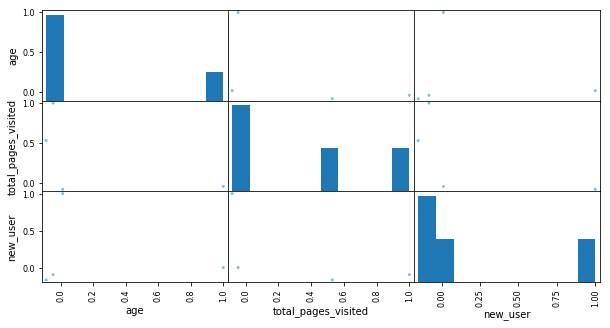

In [9]:
from pandas.plotting import scatter_matrix
attr = ['age', 'total_pages_visited','new_user']

scatter_matrix(corr_matrix[attr], figsize = (10,5))

Or similarly, using `seaborn`:

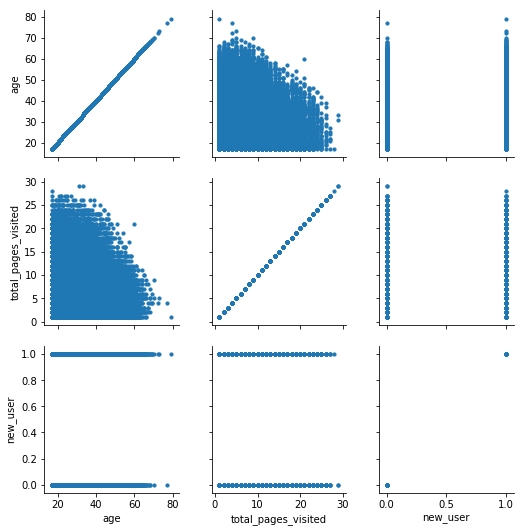

In [10]:
scatter_plot = sns.PairGrid(df[attr])
scatter_plot.map(plt.scatter, s = 10)

We can also get more advanced with `seaborn` by plotting out it across conversion:

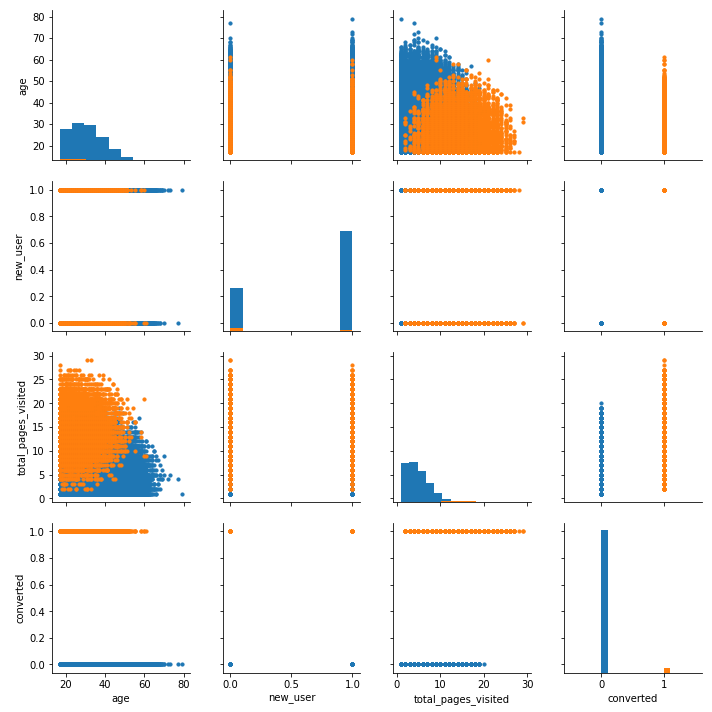

In [11]:
scatter_plot = sns.PairGrid(df, hue = 'converted')
scatter_plot.map_diag(plt.hist)
scatter_plot.map_offdiag(plt.scatter, s=10)

----
## Now let's take a look at categorical data:

__Note__: This can be better written into functions as I personally use them very often

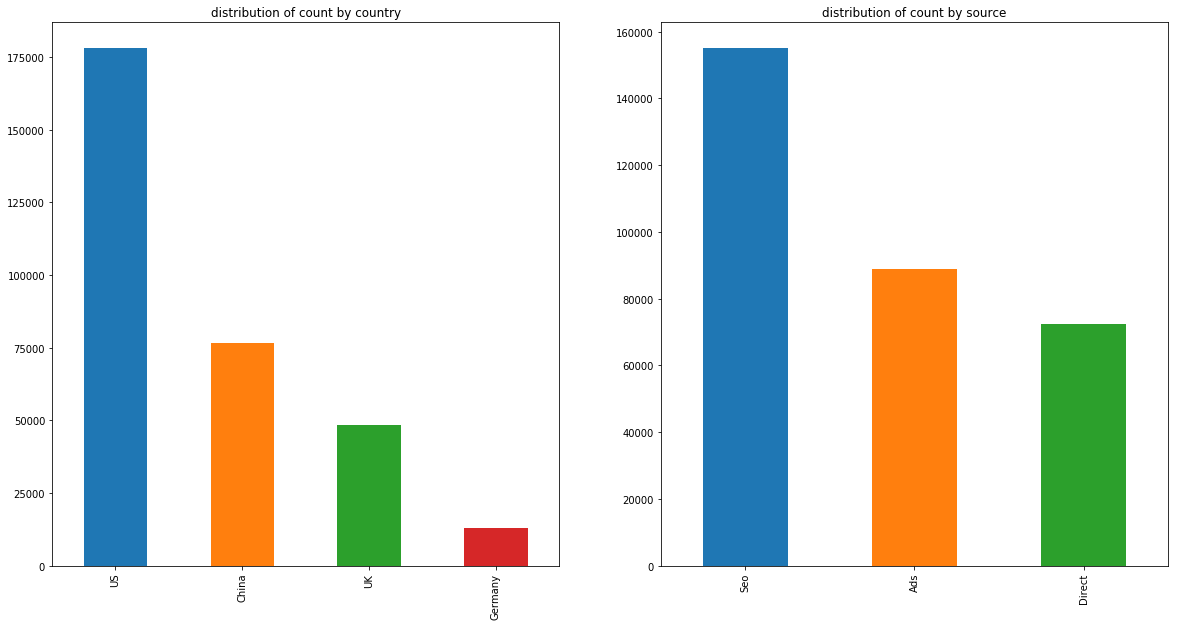

In [12]:
import math

cat_col = ['country', 'source']

plt.figure(figsize = (20,10))

for i, value in enumerate(cat_col):
    plt.subplot(math.ceil(len(cat_col)/2),2,1 + i)
    df[value].value_counts().plot(kind = 'bar')
    plt.title('distribution of count by %s' % value)

We can also use `seaborn` for easier plotting

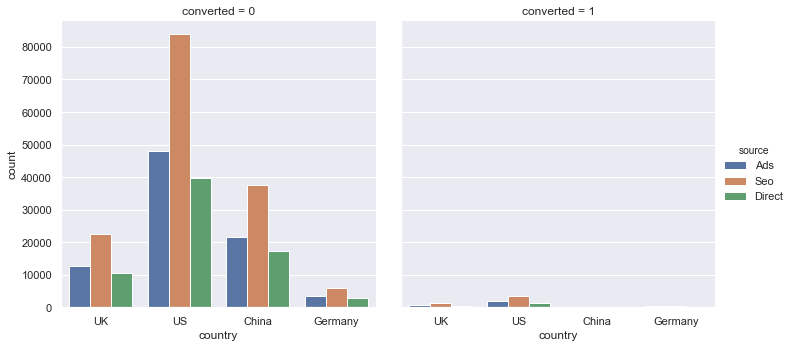

In [13]:
sns.set(style = 'darkgrid')
sns.catplot(x = 'country', hue = 'source', col = 'converted',
           data = df, kind = 'count')

Similarly, we can plot it differently with `x='source'` and `hue = 'country'`

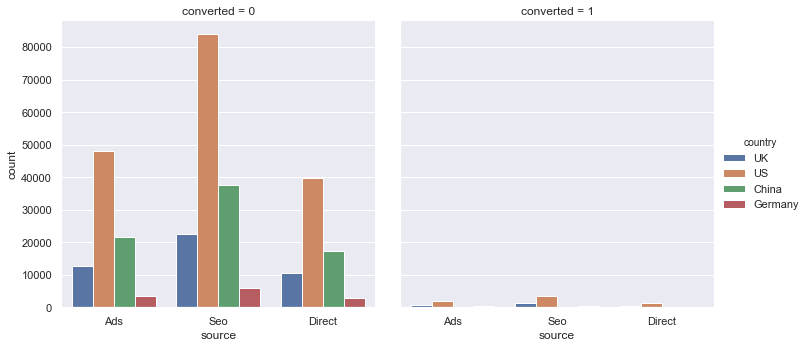

In [14]:
sns.catplot(x = 'source', hue = 'country', col = 'converted',
           data = df, kind = 'count')

With this, we can see that:
- for conversion by country, China & Germany has very bad performance -- further more, Germany might not be that bad because the volume is low by nature; __while China has much more volume, but the conversion are staggering low__
- for conversion by source, China & Germany has similar issues

----
## Better & more relevant visualization using @ Jifu Zhao's idea, (Github linked [here](https://github.com/JifuZhao/DS-Take-Home))

Instead of simply visualizing count of categories, since we care so much about conversion, we'll plot these values across both count and average conversion and see what does the distribution looks like, we'll break it down by:
- categorical values
    1. User
    2. Country
    3. Source
- numeric values:
    1. Age
    2. Pages Visited

Example:

/Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


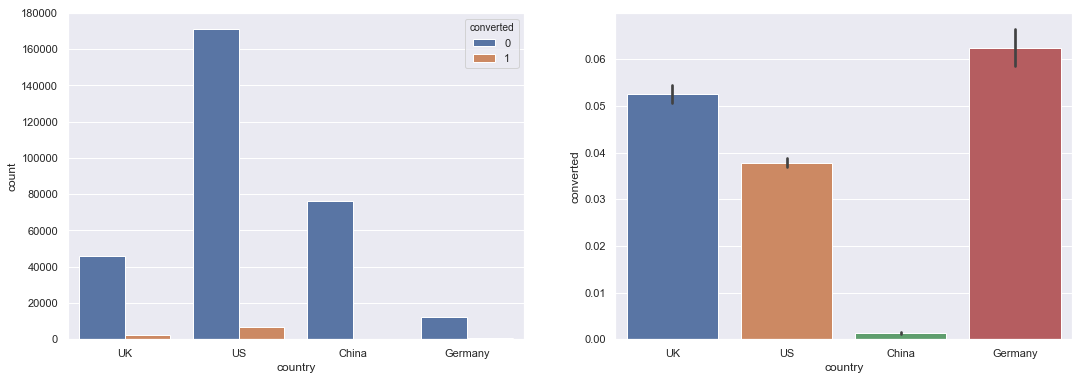

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.countplot(x = 'country', hue = 'converted', data = df, ax=ax[0])
sns.barplot(x = 'country', y = 'converted', data = df, ax= ax[1])

We can have this done more efficiently via `for` loops:

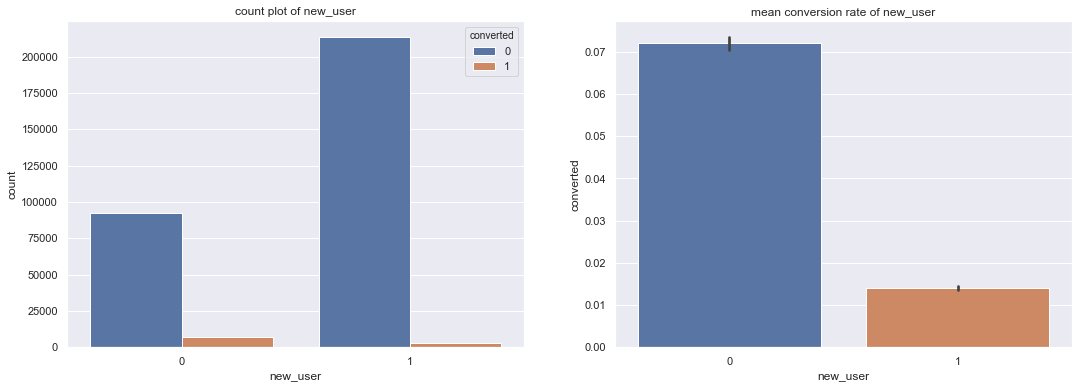

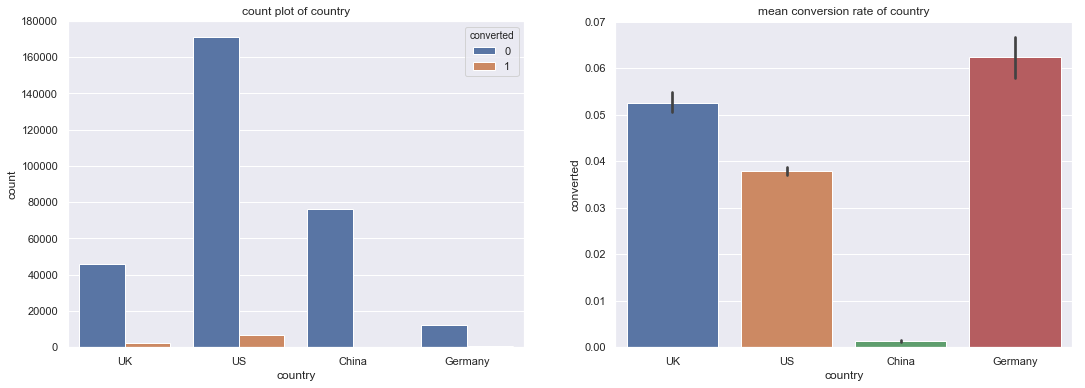

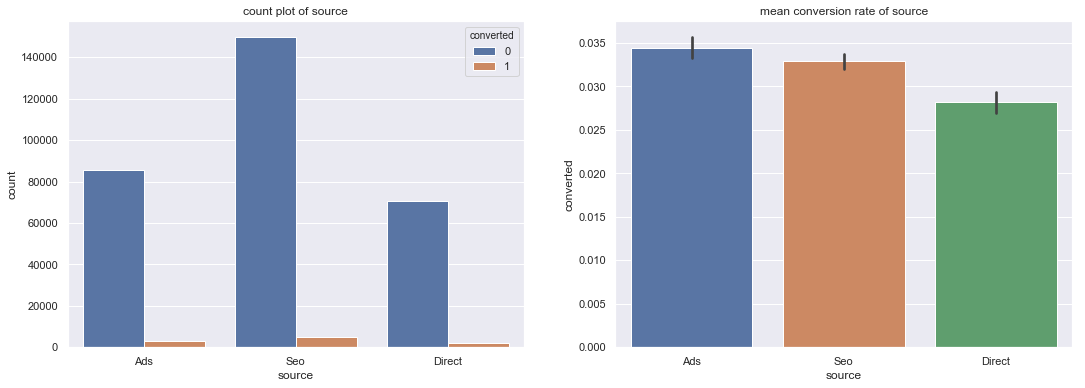

In [16]:
for col in ['new_user','country', 'source']:
    fix, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
    sns.countplot( x= col, hue = 'converted', data = df, ax = ax[0])
    ax[0].set_title('count plot of {}'.format(col))
    sns.barplot(x = col, y= 'converted', data = df, ax = ax[1])
    ax[1].set_title('mean conversion rate of {}'.format(col))

Similarly,  we can plot numeric values:

Text(0.5, 1.0, 'mean conversion rate by age')

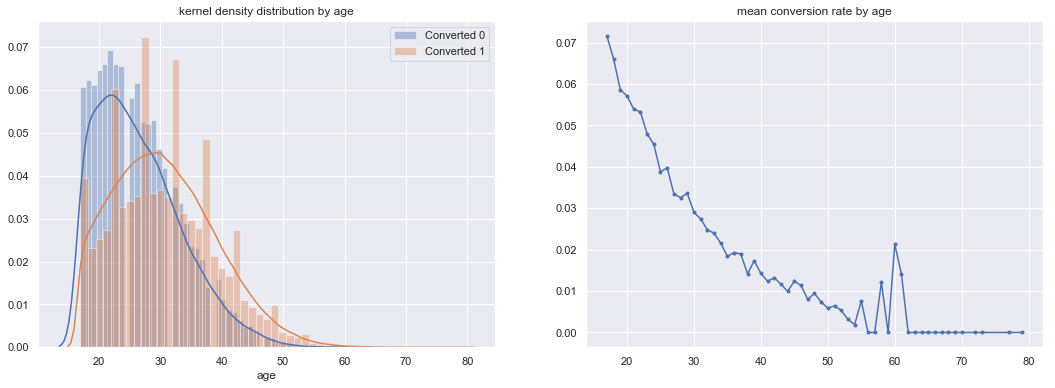

In [17]:
avg_conversion = df[['age','converted']].groupby('age').mean().reset_index()
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
sns.distplot(df[df.converted ==1]['age'], bins = 50, ax=ax[0], label = 'Converted 0')
sns.distplot(df[df.converted ==0]['age'], bins = 50, ax=ax[0], label = 'Converted 1')
ax[0].legend()
ax[0].set_title('kernel density distribution by age')
ax[1].plot('age','converted', '.-', data = avg_conversion)
ax[1].set_title('mean conversion rate by age')

Using a for loop to plot across multiple numeric values

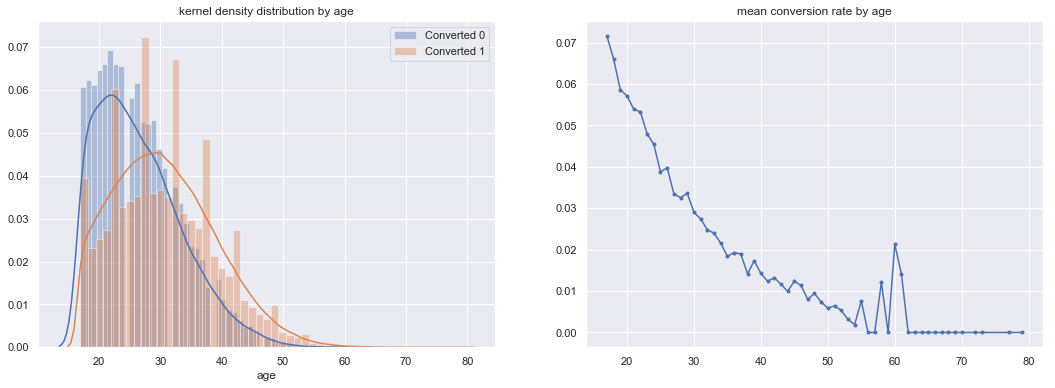

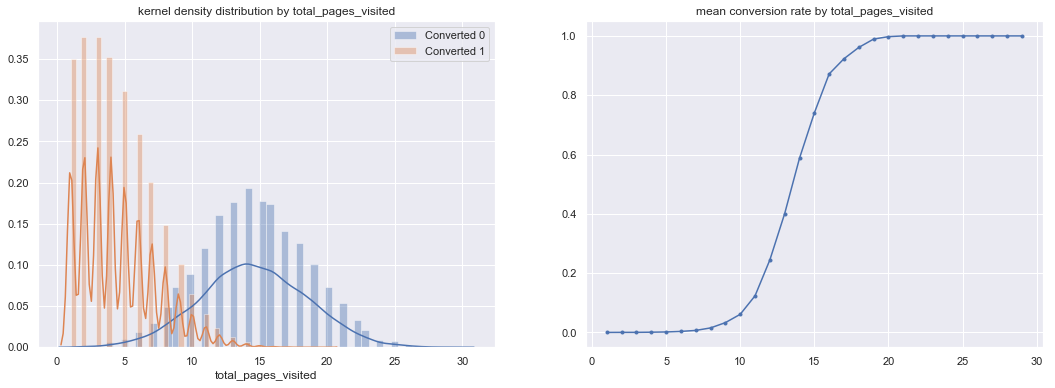

In [18]:
for col in ['age','total_pages_visited']:
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18,6))
    sns.distplot(df[df.converted ==1][col], bins = 50, ax = ax[0], label = 'Converted 0')
    sns.distplot(df[df.converted ==0][col], bins = 50, ax = ax[0], label = 'Converted 1')
    ax[0].legend()
    ax[0].set_title('kernel density distribution by {}'.format(col))
    ax[1].plot(col, 'converted', '.-', data = df[[col, 'converted']].groupby(col).mean().reset_index())
    ax[1].set_title('mean conversion rate by {}'.format(col))

---
## Summary
To summarize, in this section, we have:
- For numeric values:
    1. Looked at distribution of age, and take out abnormal values for age
    2. Looked at distribution of total_pages_visited, they are as expected to be exponentially distributed
    
- For categorical values:
    1. Looked at conversion by country, and found out that with more volume in China, the conversion rate is still very low
    2. Looked at conversion by channel, and they are as expected

# Feature Engineering For Dataset

We might want to perform certain level of feature engineering given different dataset (__specifically interactions with numeric columns__):e.g. for column A & B:
- $A\times B$
- $\frac{A}{B}$ <br>

however for this dataset, since it's so simple, we would just skip this part

# Prediction Preprocessing Pipelines

## Make a copy of dataset & split dataset into train and test

Before we do anything, make a copy of `df` just to be safe.

In [19]:
df_copy = df.copy()

Splitting the dataset into train and test:

In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 123)

train_set.head()

,country,age,new_user,source,total_pages_visited,converted
11937,US,25,1,Ads,8,0
20935,UK,36,0,Seo,11,0
172496,UK,19,1,Ads,10,0
192608,US,18,1,Seo,5,0
249105,US,38,1,Direct,3,0


## Getting `y` value out of dataset

In [21]:
y_train = train_set.pop('converted').values

y_train

array([0, 0, 0, ..., 0, 0, 0])

## Getting `X` value out of dataset using Pipelines

In [22]:
train_set.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_attr = ['age','total_pages_visited']
cat_attr = ['country','new_user','source']


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),  # using median imputation for missing values
    ('std_scaler', StandardScaler()), # scaling all numeric values
])

cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder()), # using onehotencoding for all categorical values
]

)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attr),
    ('cat', cat_pipeline, cat_attr),
], n_jobs = -1
)

X_train = full_pipeline.fit_transform(train_set)

print('df shape:', X_train.shape)
X_train

df shape: (252958, 11)


array([[-0.67309612,  0.93584915,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.65754753,  1.83297255,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-1.39890175,  1.53393142,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.43116091,  1.23489029,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.41561232,  0.33776689,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.38335316,  0.33776689,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

Additionally we want to extract feature lists from the pipeline

---
__Do Note How to get there (because I add in `cat_pipeline` additionally)__: <br>
1. call `named_transformers_` from `full_pipeline`
2. get`['cat']` part of `'named_transformers`
3. get`steps[0]` (i.e., first step of 2.)
4. get`[1]` after steps (i.e., the actual `OneHotEncoder()` class that is embedded here)  

In [24]:
cat_feature_name = full_pipeline.named_transformers_['cat'].steps[0][1].categories_

cat_feature_name

[array(['China', 'Germany', 'UK', 'US'], dtype=object),
 array([0, 1], dtype=object),
 array(['Ads', 'Direct', 'Seo'], dtype=object)]

In [25]:
cat_feature_name[0]

array(['China', 'Germany', 'UK', 'US'], dtype=object)

In [26]:
cat_attr

['country', 'new_user', 'source']

In [27]:
cat_attr_list = []

for i in range(len(cat_attr)):
    for j in range(len(cat_feature_name[i])):
        cat_attr_item = str(cat_attr[i]) + '_' + str(cat_feature_name[i][j])
        cat_attr_list.append(cat_attr_item)

        
cat_attr_list

['country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'new_user_0',
 'new_user_1',
 'source_Ads',
 'source_Direct',
 'source_Seo']

In [28]:
full_attr_list = num_attr + cat_attr_list
full_attr_list

['age',
 'total_pages_visited',
 'country_China',
 'country_Germany',
 'country_UK',
 'country_US',
 'new_user_0',
 'new_user_1',
 'source_Ads',
 'source_Direct',
 'source_Seo']

# Put Train set through a Random Forest

## Generating Test set

In [29]:
y_test = test_set.pop('converted').values

X_test = full_pipeline.fit_transform(test_set)

## Applying to Random Forest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 20, random_state = 123, n_jobs= -1)
rfc = rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9849936748893106

We can also use cross validation here:

In [31]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc, X_train, y_train, cv = 5, scoring = 'f1_weighted', n_jobs = -1)

array([0.98302034, 0.98387209, 0.98460058, 0.98364261, 0.98314236])

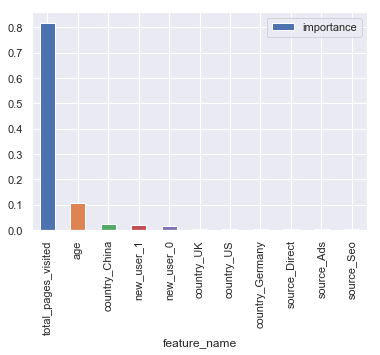

In [32]:
feature_list = pd.DataFrame({
    'feature_name': full_attr_list,
    'importance': rfc.feature_importances_,
})
    
feature_list.sort_values(by = 'importance', ascending = False).plot(kind = 'bar', x = 'feature_name', y= 'importance')

To explain the model better, try:
- partial dependence model in `sklearn.ensemble.partial_dependence`
- SHAP(SHapley Additive exPlanations)
- H2O random forest

In [33]:
import h2o
h2o.init(nthreads= -1)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "11.0.1" 2018-10-16 LTS; Java(TM) SE Runtime Environment 18.9 (build 11.0.1+13-LTS); Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.1+13-LTS, mixed mode)
  Starting server from /Users/yigongzhang/miniconda3/envs/python/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmppjmn62jn
  JVM stdout: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmppjmn62jn/h2o_yigongzhang_started_from_python.out
  JVM stderr: /var/folders/cg/msv4ryrx4nj787spgb4ghfxh0000gn/T/tmppjmn62jn/h2o_yigongzhang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_yigongzhang_j33chy
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [34]:
df_h2o = h2o.H2OFrame(df_copy)

df_h2o

Parse progress: |█████████████████████████████████████████████████████████| 100%


country,age,new_user,source,total_pages_visited,converted
UK,25,1,Ads,1,0
US,23,1,Seo,5,0
US,28,1,Seo,4,0
China,39,1,Seo,5,0
US,30,1,Seo,6,0
US,31,0,Seo,1,0
China,27,1,Seo,4,0
US,23,0,Ads,4,0
UK,29,0,Direct,4,0
US,25,0,Ads,2,0


Convert Categorical Columns:

In [35]:
df_h2o[['country', 'new_user','source', 'converted']] = df_h2o[['country', 'new_user','source','converted']].asfactor()

Perform Train Test Split and Separate target y column

In [36]:
# Train Test Split
h2o_train, h2o_valid, h2o_test = df_h2o.split_frame([0.6, 0.2], seed = 123)


# Separate X & y

df_h2o_X = df_h2o[:, ['country', 'age', 'new_user', 'source', 'total_pages_visited']]
df_h2o_y = df_h2o[:,'converted']

df_h2o_X

country,age,new_user,source,total_pages_visited
UK,25,1,Ads,1
US,23,1,Seo,5
US,28,1,Seo,4
China,39,1,Seo,5
US,30,1,Seo,6
US,31,0,Seo,1
China,27,1,Seo,4
US,23,0,Ads,4
UK,29,0,Direct,4
US,25,0,Ads,2


Now pass this into a H2O Random Forest Model

In [37]:
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o_rf = H2ORandomForestEstimator( model_id = 'h2o_rf',
                                  ntrees = 100,
                                  stopping_rounds = 10,
                                  nfolds = 5,
                                  score_each_iteration = True,
                                  seed = 123

)

h2o_rf.train(['country', 'age', 'new_user', 'source', 'total_pages_visited'], 'converted', training_frame = h2o_train, validation_frame = h2o_valid)

performance = h2o_rf.model_performance(test_data = h2o_test)
performance

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.01252371215782963
RMSE: 0.11190939262559524
LogLoss: 0.04977309988437631
Mean Per-Class Error: 0.07625567608896833
AUC: 0.9779522002016903
pr_auc: 0.7912653954692644
Gini: 0.9559044004033805
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4235198839471258: 


,0,1,Error,Rate
0,60633.0,348.0,0.0057,(348.0/60981.0)
1,631.0,1452.0,0.3029,(631.0/2083.0)
Total,61264.0,1800.0,0.0155,(979.0/63064.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4235199,0.7478754,162.0
max f2,0.1662838,0.7599963,246.0
max f0point5,0.6318823,0.8014491,111.0
max accuracy,0.4370806,0.9844761,159.0
max precision,0.9995664,1.0,0.0
max recall,0.0002641,1.0,397.0
max specificity,0.9995664,1.0,0.0
max absolute_mcc,0.4235199,0.7420109,162.0
max min_per_class_accuracy,0.0154358,0.9219265,352.0
max mean_per_class_accuracy,0.0181117,0.9237443,348.0


Gains/Lift Table: Avg response rate:  3.30 %, avg score:  3.20 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100216,0.9775810,29.3174766,29.3174766,0.9683544,0.9916543,0.9683544,0.9916543,0.2938070,0.2938070,2831.7476619,2831.7476619
,2,0.0200114,0.7372133,25.1815803,27.2528057,0.8317460,0.8953618,0.9001585,0.9435843,0.2515602,0.5453673,2418.1580291,2625.2805710
,3,0.0300806,0.3766094,16.3535724,23.6044066,0.5401575,0.5486162,0.7796521,0.8113731,0.1646663,0.7100336,1535.3572414,2260.4406584
,4,0.0400070,0.1866976,8.0767080,19.7517156,0.2667732,0.2674737,0.6523979,0.6764222,0.0801728,0.7902064,707.6707992,1875.1715613
,5,0.0500603,0.1119410,4.4888060,16.6865637,0.1482650,0.1420708,0.5511562,0.5691118,0.0451272,0.8353337,348.8806032,1568.6563673
,6,0.1000095,0.0176724,1.6819758,9.1925964,0.0555556,0.0470676,0.3036309,0.3083794,0.0840134,0.9193471,68.1975783,819.2596358
,7,0.1501649,0.0044901,0.7561712,6.3748125,0.0249763,0.0094431,0.2105597,0.2085341,0.0379261,0.9572732,-24.3828782,537.4812544
,8,0.2044748,0.0024601,0.2563478,4.7497066,0.0084672,0.0031336,0.1568825,0.1539783,0.0139222,0.9711954,-74.3652158,374.9706565
,9,0.3003298,0.0013353,0.1352258,3.2769222,0.0044665,0.0017612,0.1082365,0.1053958,0.0129621,0.9841575,-86.4774155,227.6922196
,10,0.4000222,0.0009982,0.0577870,2.4746586,0.0019087,0.0011410,0.0817378,0.0794137,0.0057609,0.9899184,-94.2213016,147.4658626


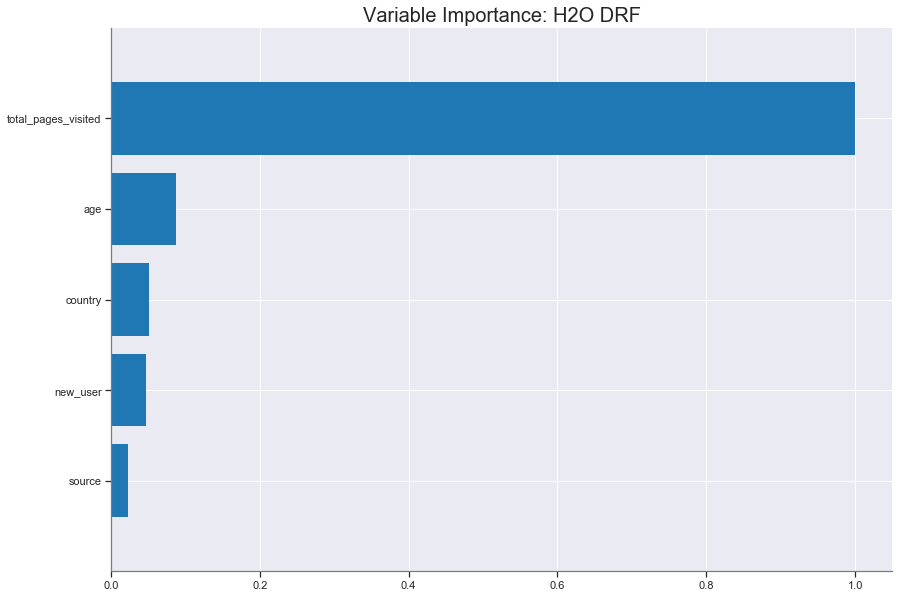

In [38]:
h2o_rf.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model h2o_rf on column 'country'



country,mean_response,stddev_response,std_error_mean_response
China,0.0103261,0.0770393,0.0003068
Germany,0.0429308,0.1640675,0.0006533
UK,0.0393271,0.1578057,0.0006284
US,0.0337355,0.1453237,0.0005787


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'age'



age,mean_response,stddev_response,std_error_mean_response
17.0,0.0428880,0.1624577,0.0006469
20.2631579,0.0393105,0.1563138,0.0006225
23.5263158,0.0354825,0.1535625,0.0006115
26.7894737,0.0317815,0.1418555,0.0005649
30.0526316,0.0313396,0.1433769,0.0005709
33.3157895,0.0280506,0.1331799,0.0005303
36.5789474,0.0263423,0.1333945,0.0005312
39.8421053,0.0246518,0.1300412,0.0005178
43.1052632,0.0238029,0.1227368,0.0004887
46.3684211,0.0211831,0.1203131,0.0004791


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'new_user'



new_user,mean_response,stddev_response,std_error_mean_response
0,0.0447412,0.1637174,0.0006519
1,0.0231266,0.1226130,0.0004883


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'source'



source,mean_response,stddev_response,std_error_mean_response
Ads,0.0323785,0.1482478,0.0005903
Direct,0.0304648,0.1395453,0.0005557
Seo,0.0324380,0.1458962,0.0005810


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'total_pages_visited'



total_pages_visited,mean_response,stddev_response,std_error_mean_response
1.0,0.0008302,0.0009706,0.0000039
2.4736842,0.0010286,0.0034479,0.0000137
3.9473684,0.0016225,0.0049998,0.0000199
5.4210526,0.0022615,0.0089479,0.0000356
6.8947368,0.0063123,0.0170636,0.0000679
8.3684211,0.0142232,0.0361777,0.0001441
9.8421053,0.0552156,0.0968591,0.0003857
11.3157895,0.1028276,0.1488404,0.0005927
12.7894737,0.2702977,0.2716684,0.0010818
14.2631579,0.4092011,0.3209035,0.0012779


[, , , , ]

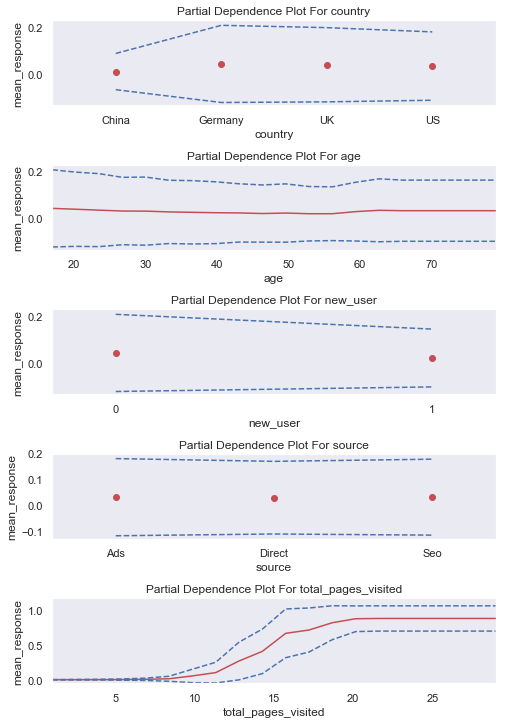

In [39]:
h2o_rf.partial_plot(h2o_test, ['country', 'age', 'new_user', 'source', 'total_pages_visited'])

With this, apparently that `total_pages_visited` is a strong indicator for conversion. __However, unfortunately, it's the least actionable one__. <br>
Therefore, let's see what would happen if we just train the model without total_pages_visited

In [40]:
h2o_rf_2 = H2ORandomForestEstimator( model_id = 'h2o_rf_2',
                                  ntrees = 100,
                                  stopping_rounds = 10,
                                  nfolds = 5,
                                  score_each_iteration = True,
                                  seed = 123

)

h2o_rf_2.train(['country', 'age', 'new_user', 'source'], 'converted', training_frame = h2o_train, validation_frame = h2o_valid)

performance = h2o_rf_2.model_performance(test_data = h2o_test)
performance

drf Model Build progress: |███████████████████████████████████████████████| 100%

ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.030145365804678356
RMSE: 0.17362420857898347
LogLoss: 0.12269901291031661
Mean Per-Class Error: 0.25827184250892055
AUC: 0.8146033153271267
pr_auc: 0.1269532995158609
Gini: 0.6292066306542534
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11785393740449636: 


,0,1,Error,Rate
0,57241.0,3740.0,0.0613,(3740.0/60981.0)
1,1384.0,699.0,0.6644,(1384.0/2083.0)
Total,58625.0,4439.0,0.0813,(5124.0/63064.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1178539,0.2143514,84.0
max f2,0.0554789,0.3241927,163.0
max f0point5,0.1475176,0.1804364,55.0
max accuracy,0.3756068,0.9669542,0.0
max precision,0.3267821,0.2857143,1.0
max recall,0.0005368,1.0,395.0
max specificity,0.3756068,0.9999836,0.0
max absolute_mcc,0.0554789,0.2081322,163.0
max min_per_class_accuracy,0.0313302,0.7383581,225.0
max mean_per_class_accuracy,0.0274115,0.7417282,241.0


Gains/Lift Table: Avg response rate:  3.30 %, avg score:  3.15 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101167,0.1965630,6.2164559,6.2164559,0.2053292,0.2253077,0.2053292,0.2253077,0.0628901,0.0628901,521.6455950,521.6455950
,2,0.0203603,0.1602858,5.3427466,5.7768794,0.1764706,0.1729347,0.1908100,0.1989580,0.0547288,0.1176188,434.2746604,477.6879441
,3,0.0300806,0.1475176,5.1364742,5.5699377,0.1696574,0.1516777,0.1839747,0.1836798,0.0499280,0.1675468,413.6474169,456.9937727
,4,0.0412755,0.1377220,3.7308415,5.0711279,0.1232295,0.1425750,0.1674990,0.1725311,0.0417667,0.2093135,273.0841467,407.1127908
,5,0.0506311,0.1290666,4.6183064,4.9874559,0.1525424,0.1318301,0.1647354,0.1650104,0.0432069,0.2525204,361.8306387,398.7455907
,6,0.1013732,0.0960609,3.2830065,4.1342981,0.1084375,0.1125029,0.1365556,0.1387279,0.1665867,0.4191071,228.3006481,313.4298053
,7,0.1517506,0.0702701,2.6778198,3.6507838,0.0884482,0.0802937,0.1205852,0.1193292,0.1349016,0.5540086,167.7819801,265.0783799
,8,0.2019694,0.0454899,1.8928202,3.2136738,0.0625197,0.0569177,0.1061474,0.1038108,0.0950552,0.6490639,89.2820237,221.3673758
,9,0.3001554,0.0290557,1.1832504,2.5494875,0.0390827,0.0349951,0.0842094,0.0813000,0.1161786,0.7652424,18.3250405,154.9487514
,10,0.4006406,0.0205401,0.7644138,2.1017707,0.0252485,0.0244986,0.0694214,0.0670536,0.0768123,0.8420547,-23.5586199,110.1770736


PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model h2o_rf on column 'country'



country,mean_response,stddev_response,std_error_mean_response
China,0.0103261,0.0770393,0.0003068
Germany,0.0429308,0.1640675,0.0006533
UK,0.0393271,0.1578057,0.0006284
US,0.0337355,0.1453237,0.0005787


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'age'



age,mean_response,stddev_response,std_error_mean_response
17.0,0.0428880,0.1624577,0.0006469
20.2631579,0.0393105,0.1563138,0.0006225
23.5263158,0.0354825,0.1535625,0.0006115
26.7894737,0.0317815,0.1418555,0.0005649
30.0526316,0.0313396,0.1433769,0.0005709
33.3157895,0.0280506,0.1331799,0.0005303
36.5789474,0.0263423,0.1333945,0.0005312
39.8421053,0.0246518,0.1300412,0.0005178
43.1052632,0.0238029,0.1227368,0.0004887
46.3684211,0.0211831,0.1203131,0.0004791


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'new_user'



new_user,mean_response,stddev_response,std_error_mean_response
0,0.0447412,0.1637174,0.0006519
1,0.0231266,0.1226130,0.0004883


PartialDependence: Partial Dependence Plot of model h2o_rf on column 'source'



source,mean_response,stddev_response,std_error_mean_response
Ads,0.0323785,0.1482478,0.0005903
Direct,0.0304648,0.1395453,0.0005557
Seo,0.0324380,0.1458962,0.0005810


[, , , ]

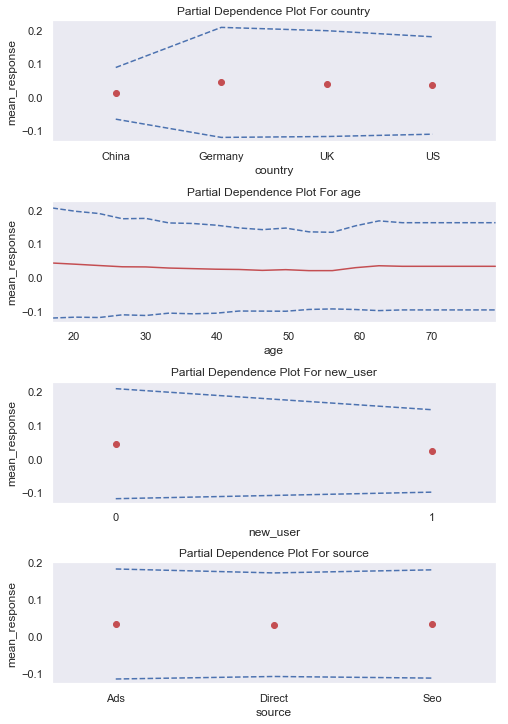

In [41]:
h2o_rf.partial_plot(h2o_test, ['country', 'age', 'new_user', 'source'])

## Trying GBRT model for better partial dependency

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.01, random_state = 123, n_estimators = 3)

gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=3,
              n_iter_no_change=None, presort='auto', random_state=123,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [43]:
cross_val_score(gbc, X_train, y_train, cv = 5, scoring = 'f1_weighted', n_jobs = -1)

array([0.95146682, 0.95146682, 0.95146682, 0.95146682, 0.95149423])

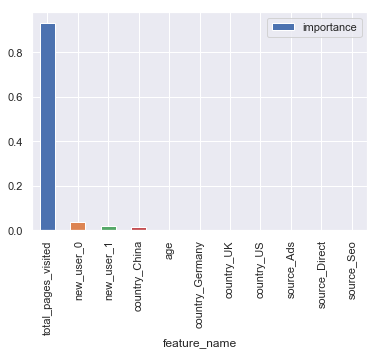

In [44]:
feature_list_gbc = pd.DataFrame({
    'feature_name': full_attr_list,
    'importance': gbc.feature_importances_,
})
    
feature_list_gbc.sort_values(by = 'importance', ascending = False).plot(kind = 'bar', x = 'feature_name', y= 'importance')

Adding Partial Dependence Plot here:

[]

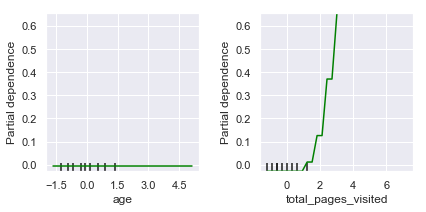

In [45]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

features = [0,1]
plot_partial_dependence(gbc, X_train, features, feature_names = full_attr_list)
plt.plot(figsize= (30,20))

----
Still needs to check `Xgboost` and `Shap` implementation for visualization; so far H2O seems to provide valid options